In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import os

pwd=os.getcwd()
data_dir=pwd+'\\Game_Records\\performance_summaries\\'
print(data_dir)

C:\Users\Bill\pic_a_wheel\Game_Records\performance_summaries\


In [2]:
hand_summaries=[x for x in os.listdir(data_dir) if x.find('sum')>=0]
all_hands=pd.DataFrame()
for h in hand_summaries:
    tmp=pd.read_csv(data_dir+h,index_col=0)
    tmp['Game']=h.split('_')[3]
    tmp.rename(columns={'Ante/Bet':'t_Ante/Bet','Winnings':'t_Winnings','Profit':'t_Profit'},inplace=True)
    all_hands=all_hands.append(tmp)
    
all_hands.reset_index(drop=True,inplace=True)
all_hands.to_csv(data_dir+"all_hands_df.csv")
all_hands

,date,time,hand,Name,t_Ante/Bet,t_Winnings,t_Profit,Game
0,2020-06-04,20:33:27.383168,12,Judogi,145,205,60,2
1,2020-06-04,20:33:27.383168,12,Mr.Pink,155,195,40,2
2,2020-06-04,20:33:27.383168,12,JohnAlba,110,110,0,2
3,2020-06-04,20:33:27.383168,12,Clyde,135,105,-30,2
4,2020-06-04,20:33:27.383168,12,Bornstein,70,0,-70,2
...,...,...,...,...,...,...,...,...
96,2020-06-04,23:14:10.351084,4,Bornstein,80,70,-10,5
97,2020-06-04,23:14:10.351084,4,Mr.Pink,100,90,-10,5
98,2020-06-04,23:14:10.351084,4,Mercer,40,0,-40,5
99,2020-06-04,23:14:10.351084,4,Clyde,115,70,-45,5


## Calculate Hand Variables

In [3]:
by_player=all_hands.sort_values(['Name','time']).copy()
by_player['time']=pd.to_datetime(by_player['time'])

def calc_hand_column(column_name,df):
    tmp=df.groupby(['Name','Game'])[column_name].shift(1).fillna(0)
    df['h_'+column_name]=df[column_name]-tmp
    return

total_vars=['t_Ante/Bet','t_Winnings','t_Profit']
for c in total_vars:
    calc_hand_column(c,by_player)
by_player['Nightly_Winnings']=by_player.groupby('Name')['h_t_Profit'].cumsum()
by_player.to_csv(data_dir+"by_player_df.csv")
by_player

,date,time,hand,Name,t_Ante/Bet,t_Winnings,t_Profit,Game,h_t_Ante/Bet,h_t_Winnings,h_t_Profit,Nightly_Winnings
86,2020-06-04,2020-06-05 21:04:22.792923,7,Bartman,45,0,-45,4,45.0,0.0,-45.0,-45.0
28,2020-06-04,2020-06-05 21:16:08.417787,11,Bartman,125,140,15,4,80.0,140.0,60.0,15.0
38,2020-06-04,2020-06-05 21:27:26.982762,13,Bartman,210,140,-70,4,85.0,0.0,-85.0,-70.0
45,2020-06-04,2020-06-05 21:42:14.327715,15,Bartman,285,140,-145,4,75.0,0.0,-75.0,-145.0
52,2020-06-04,2020-06-05 21:56:37.038847,17,Bartman,295,140,-155,4,10.0,0.0,-10.0,-155.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020-06-04,2020-06-05 22:25:13.034338,22,Mr.Pink,320,505,185,4,10.0,0.0,-10.0,260.0
67,2020-06-04,2020-06-05 22:36:00.677854,24,Mr.Pink,330,505,175,4,10.0,0.0,-10.0,250.0
75,2020-06-04,2020-06-05 22:48:22.395124,26,Mr.Pink,355,505,150,4,25.0,0.0,-25.0,225.0
88,2020-06-04,2020-06-05 23:04:05.161376,2,Mr.Pink,75,90,15,5,75.0,90.0,15.0,240.0


## Get Nightly Totals

In [4]:
nightly_totals=pd.DataFrame()
player_list=by_player.Name.unique()

for p in player_list:
    tmp=by_player.loc[by_player.Name==p,:]
    last_hand=tmp.time.max()
    tmp=tmp.loc[tmp.time==last_hand,['date','time','Name','Nightly_Winnings']]
    nightly_totals=nightly_totals.append(tmp)

nightly_totals=nightly_totals.sort_values('Nightly_Winnings', ascending=False)
nightly_totals.to_csv(data_dir+"nightly_totals.csv")
nightly_totals

,date,time,Name,Nightly_Winnings
94,2020-06-04,2020-06-05 23:14:10.351084,Judogi,300.0
97,2020-06-04,2020-06-05 23:14:10.351084,Mr.Pink,215.0
99,2020-06-04,2020-06-05 23:14:10.351084,Clyde,70.0
100,2020-06-04,2020-06-05 23:14:10.351084,Bartman,-50.0
95,2020-06-04,2020-06-05 23:14:10.351084,JohnAlba,-105.0
98,2020-06-04,2020-06-05 23:14:10.351084,Mercer,-190.0
96,2020-06-04,2020-06-05 23:14:10.351084,Bornstein,-310.0


## How'd the night go

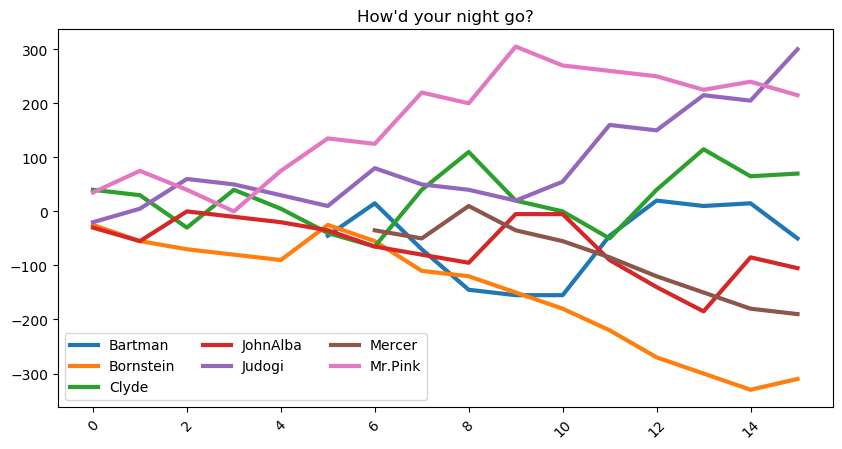

In [5]:
plt.figure(figsize=(10,5),dpi=100)

t2=by_player.copy()
t2['time']=t2.time.apply(lambda x: x.hour*60+x.minute)
times_uni=sorted(t2.time.unique())
times_dict={times_uni[x]:x for x in range(len(times_uni))}
t2['hand_num']=t2.time.apply(lambda x: times_dict[x])

for p in player_list:
    tmp=t2.loc[by_player.Name==p,:].sort_values('time')
    plt.plot(tmp.hand_num,tmp.Nightly_Winnings,lw=3.0,label=p)
plt.legend(loc="best",ncol=3)
plt.xticks(rotation=45)
plt.title("How'd your night go?")
plt.savefig(data_dir+"Howthenightwent.png")
plt.show()
    